In [34]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [35]:
df = pd.read_csv(os.path.join("enron_test_data.csv"))
df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
0,243293.0,1045.0,NaN,288682.0,5538001.0,1500000.0,853064.0,1035.0,NaN,6391065.0,34039.0,NaN,32.0,11350.0,21.0,True,NaN,-3117011.0,1617011.0,32.0
1,370448.0,2355.0,NaN,4099771.0,1104054.0,2600000.0,558801.0,2228.0,NaN,1662855.0,137108.0,NaN,48.0,297353.0,26.0,False,NaN,NaN,694862.0,58.0
2,197091.0,1238.0,1130036.0,1737629.0,880290.0,400000.0,409554.0,742.0,-409554.0,880290.0,43057.0,NaN,222.0,778.0,48.0,False,NaN,-33333.0,NaN,61.0
3,248546.0,2475.0,NaN,2014835.0,765313.0,850000.0,189041.0,2326.0,NaN,954354.0,84208.0,NaN,14.0,272.0,2.0,False,NaN,NaN,831809.0,25.0
4,288542.0,1758.0,27610.0,1490344.0,NaN,1200000.0,698242.0,1132.0,NaN,698242.0,16514.0,NaN,40.0,101740.0,11.0,True,NaN,-144062.0,NaN,240.0


In [36]:
# Not needed for trimmed model - Drop Total/Travel Agency Column
# df = df[df.name != 'TOTAL']
 
# df = df[df.name != 'THE TRAVEL AGENCY IN THE PARK']

In [37]:
# Not needed for trimmed model Drop non numeric columns
# drop_columns = ['name', 'email_address']
# df.drop(drop_columns, inplace=True, axis=1)
# df.head()

In [39]:
df.fillna(0,inplace=True)
df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
0,243293.0,1045.0,0.0,288682.0,5538001.0,1500000.0,853064.0,1035.0,0.0,6391065.0,34039.0,0.0,32.0,11350.0,21.0,True,0.0,-3117011.0,1617011.0,32.0
1,370448.0,2355.0,0.0,4099771.0,1104054.0,2600000.0,558801.0,2228.0,0.0,1662855.0,137108.0,0.0,48.0,297353.0,26.0,False,0.0,0.0,694862.0,58.0
2,197091.0,1238.0,1130036.0,1737629.0,880290.0,400000.0,409554.0,742.0,-409554.0,880290.0,43057.0,0.0,222.0,778.0,48.0,False,0.0,-33333.0,0.0,61.0
3,248546.0,2475.0,0.0,2014835.0,765313.0,850000.0,189041.0,2326.0,0.0,954354.0,84208.0,0.0,14.0,272.0,2.0,False,0.0,0.0,831809.0,25.0
4,288542.0,1758.0,27610.0,1490344.0,0.0,1200000.0,698242.0,1132.0,0.0,698242.0,16514.0,0.0,40.0,101740.0,11.0,True,0.0,-144062.0,0.0,240.0


In [40]:
y = df["poi"]
target_names = ["False", "True"]

In [41]:
X = df.drop("poi", axis=1)
X.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
0,243293.0,1045.0,0.0,288682.0,5538001.0,1500000.0,853064.0,1035.0,0.0,6391065.0,34039.0,0.0,32.0,11350.0,21.0,0.0,-3117011.0,1617011.0,32.0
1,370448.0,2355.0,0.0,4099771.0,1104054.0,2600000.0,558801.0,2228.0,0.0,1662855.0,137108.0,0.0,48.0,297353.0,26.0,0.0,0.0,694862.0,58.0
2,197091.0,1238.0,1130036.0,1737629.0,880290.0,400000.0,409554.0,742.0,-409554.0,880290.0,43057.0,0.0,222.0,778.0,48.0,0.0,-33333.0,0.0,61.0
3,248546.0,2475.0,0.0,2014835.0,765313.0,850000.0,189041.0,2326.0,0.0,954354.0,84208.0,0.0,14.0,272.0,2.0,0.0,0.0,831809.0,25.0
4,288542.0,1758.0,27610.0,1490344.0,0.0,1200000.0,698242.0,1132.0,0.0,698242.0,16514.0,0.0,40.0,101740.0,11.0,0.0,-144062.0,0.0,240.0


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.800
k: 3, Train/Test Score: 0.833/0.733
k: 5, Train/Test Score: 0.786/0.800
k: 7, Train/Test Score: 0.762/0.800
k: 9, Train/Test Score: 0.738/0.800
k: 11, Train/Test Score: 0.738/0.800
k: 13, Train/Test Score: 0.738/0.800
k: 15, Train/Test Score: 0.738/0.800
k: 17, Train/Test Score: 0.738/0.800
k: 19, Train/Test Score: 0.738/0.800


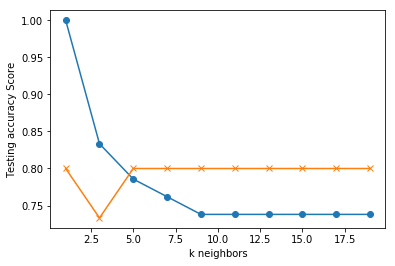

In [43]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [45]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('K=9 Test Acc: %.3f' % knn.score(X_test, y_test))

K=9 Test Acc: 0.800
